# Importing Libraries

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from pandas import set_option 
set_option('precision', 2)
from sklearn.metrics import  mean_squared_error , r2_score

In [2]:
df = pd.read_csv('train-data.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.00,6019.00,6.02e+03,5977.00,6019.00
mean,3009.00,2013.36,5.87e+04,5.28,9.48
std,1737.68,3.27,9.13e+04,0.81,11.19
min,0.00,1998.00,1.71e+02,0.00,0.44
25%,1504.50,2011.00,3.40e+04,5.00,3.50
50%,3009.00,2014.00,5.30e+04,5.00,5.64
75%,4513.50,2016.00,7.30e+04,5.00,9.95
max,6018.00,2019.00,6.50e+06,10.00,160.00


In [7]:
df.shape

(6019, 14)

# Data Cleaning

In [8]:
df.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [9]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [10]:
df.Year = df.Year.astype('object')

In [11]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [12]:
df.Name = df.Name.apply(lambda x:x.split()[0])

In [14]:
for i in ["Mileage","Engine","Power"]:
      df[i].replace({np.nan:"Null"},inplace=True)

In [17]:
df.Mileage = df.Mileage.apply(lambda x:x.split()[0])

In [18]:
df.Engine = df.Engine.apply(lambda x:x.split()[0])

In [19]:
df.Power = df.Power.apply(lambda x:x.split()[0])

In [20]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,7.88 Lakh,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,NaN,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,NaN,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,NaN,2.65


In [21]:
for i in ["Mileage","Engine","Power"]:
      df[i].replace({'Null':np.nan},inplace=True)

In [22]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Imputing missing values

In [24]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Mileage'] = imp.fit_transform(df[['Mileage']])

In [25]:
df['Engine'] = imp.fit_transform(df[['Engine']])

In [26]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [27]:
for i in ["Power"]:
      df[i].replace({'null':np.nan},inplace=True)

In [28]:
df['Power'] = imp.fit_transform(df[['Power']])

In [29]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [30]:
df.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [31]:
df.Seats = df.Seats.astype('object')

In [32]:
for i in ['Seats']:
      df[i].replace({'nan':'Null'},inplace=True)

In [33]:
df.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [34]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Seats'] = imp.fit_transform(df[['Seats']])

In [35]:
df.Seats.value_counts()

5.00     5014
7.00      674
8.00      134
4.00       99
5.28       42
6.00       31
2.00       16
10.00       5
9.00        3
0.00        1
Name: Seats, dtype: int64

In [36]:
df['Seats'].replace({0.00:5.00},inplace=True)

In [37]:
df.Seats.value_counts()

5.00     5015
7.00      674
8.00      134
4.00       99
5.28       42
6.00       31
2.00       16
10.00       5
9.00        3
Name: Seats, dtype: int64

In [38]:
df.Seats = df.Seats.astype('int')

In [39]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,NaN,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,NaN,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,8.61 Lakh,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,NaN,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5,7.88 Lakh,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5,NaN,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8,NaN,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5,NaN,2.65


In [40]:
df.drop(['New_Price'],axis = 1,inplace = True)

In [41]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5,2.65


In [42]:
df['Age'] = 2021 - df['Year']  

In [43]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,11
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,6
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,10
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,9
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5,4.75,7
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5,4.00,6
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8,2.90,9
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5,2.65,8


# Data Description

In [44]:
df.describe()                        

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6.02e+03,6019.00,6019.00,6019.00,6019.00,6019.00
mean,5.87e+04,18.13,1621.28,113.25,5.28,9.48
std,9.13e+04,4.58,599.55,53.23,0.80,11.19
min,1.71e+02,0.00,72.00,34.20,2.00,0.44
25%,3.40e+04,15.17,1198.00,78.00,5.00,3.50
50%,5.30e+04,18.15,1493.00,98.60,5.00,5.64
75%,7.30e+04,21.10,1969.00,138.03,5.00,9.95
max,6.50e+06,33.54,5998.00,560.00,10.00,160.00


In [45]:
df.corr()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Kilometers_Driven,1.00,-0.07,0.09,0.03,0.08,-0.01
Mileage,-0.07,1.00,-0.59,-0.51,-0.30,-0.31
Engine,0.09,-0.59,1.00,0.86,0.40,0.66
Power,0.03,-0.51,0.86,1.00,0.10,0.77
Seats,0.08,-0.30,0.40,0.10,1.00,0.05
Price,-0.01,-0.31,0.66,0.77,0.05,1.00


In [46]:
# here independant variable is price 
# from that we can say that the correlation between power,Engine and price is high 

# Univariate analysis  

In [47]:
Model_counts = df['Name'].value_counts()


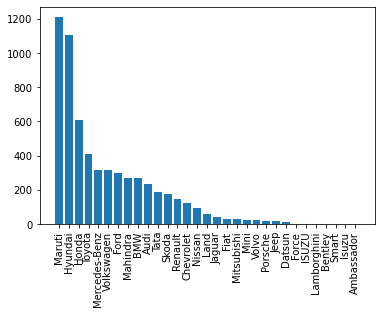

In [48]:
plt.bar(Model_counts.index,Model_counts.values)
plt.xticks(rotation=90)                                 # no of brands of vehicles 
plt.show()

In [49]:
df.Year.unique()                    # this data contain data from 1998 to 2019 

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=object)

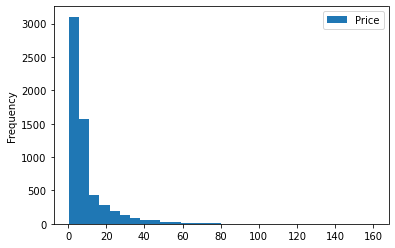

In [53]:
df.Price.plot(kind='hist', bins = 30,legend = True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

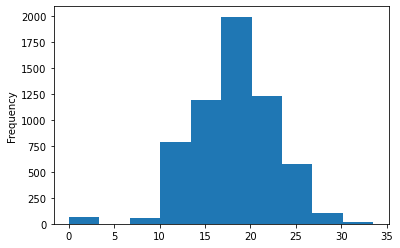

In [58]:
df.Mileage.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

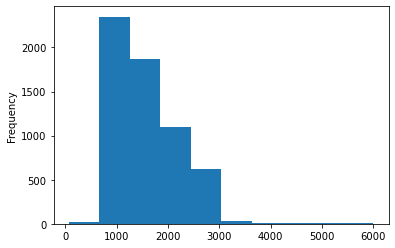

In [59]:
df.Engine.plot(kind = 'hist')

# Bivariate Analysis

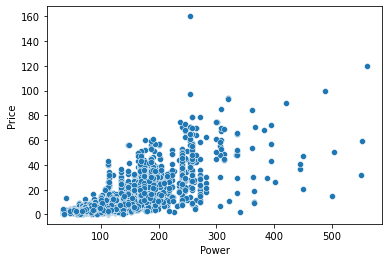

In [62]:
sns.scatterplot(df.Power,df.Price)
plt.show() 

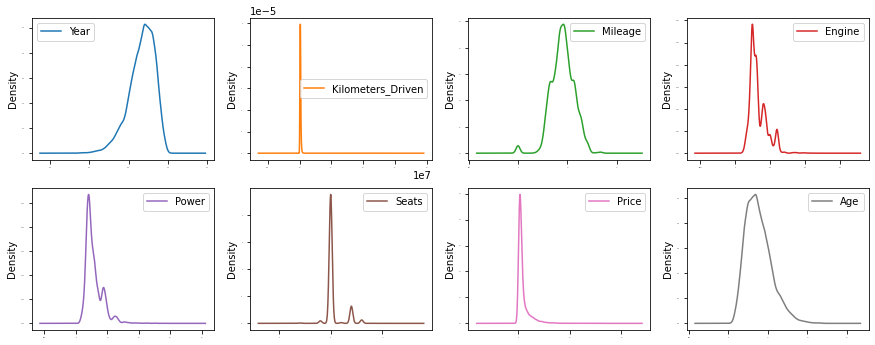

In [63]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

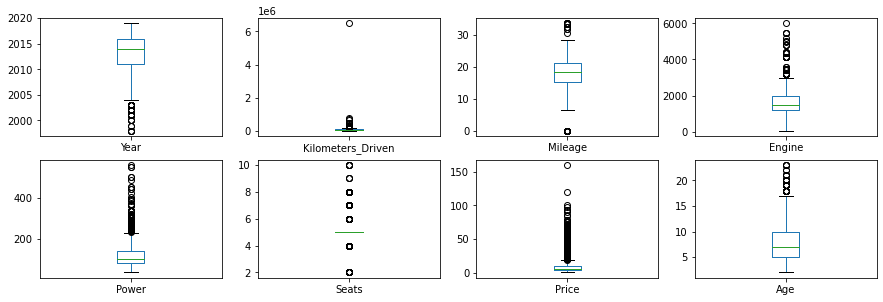

In [64]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show()

# Multivariate analysis 

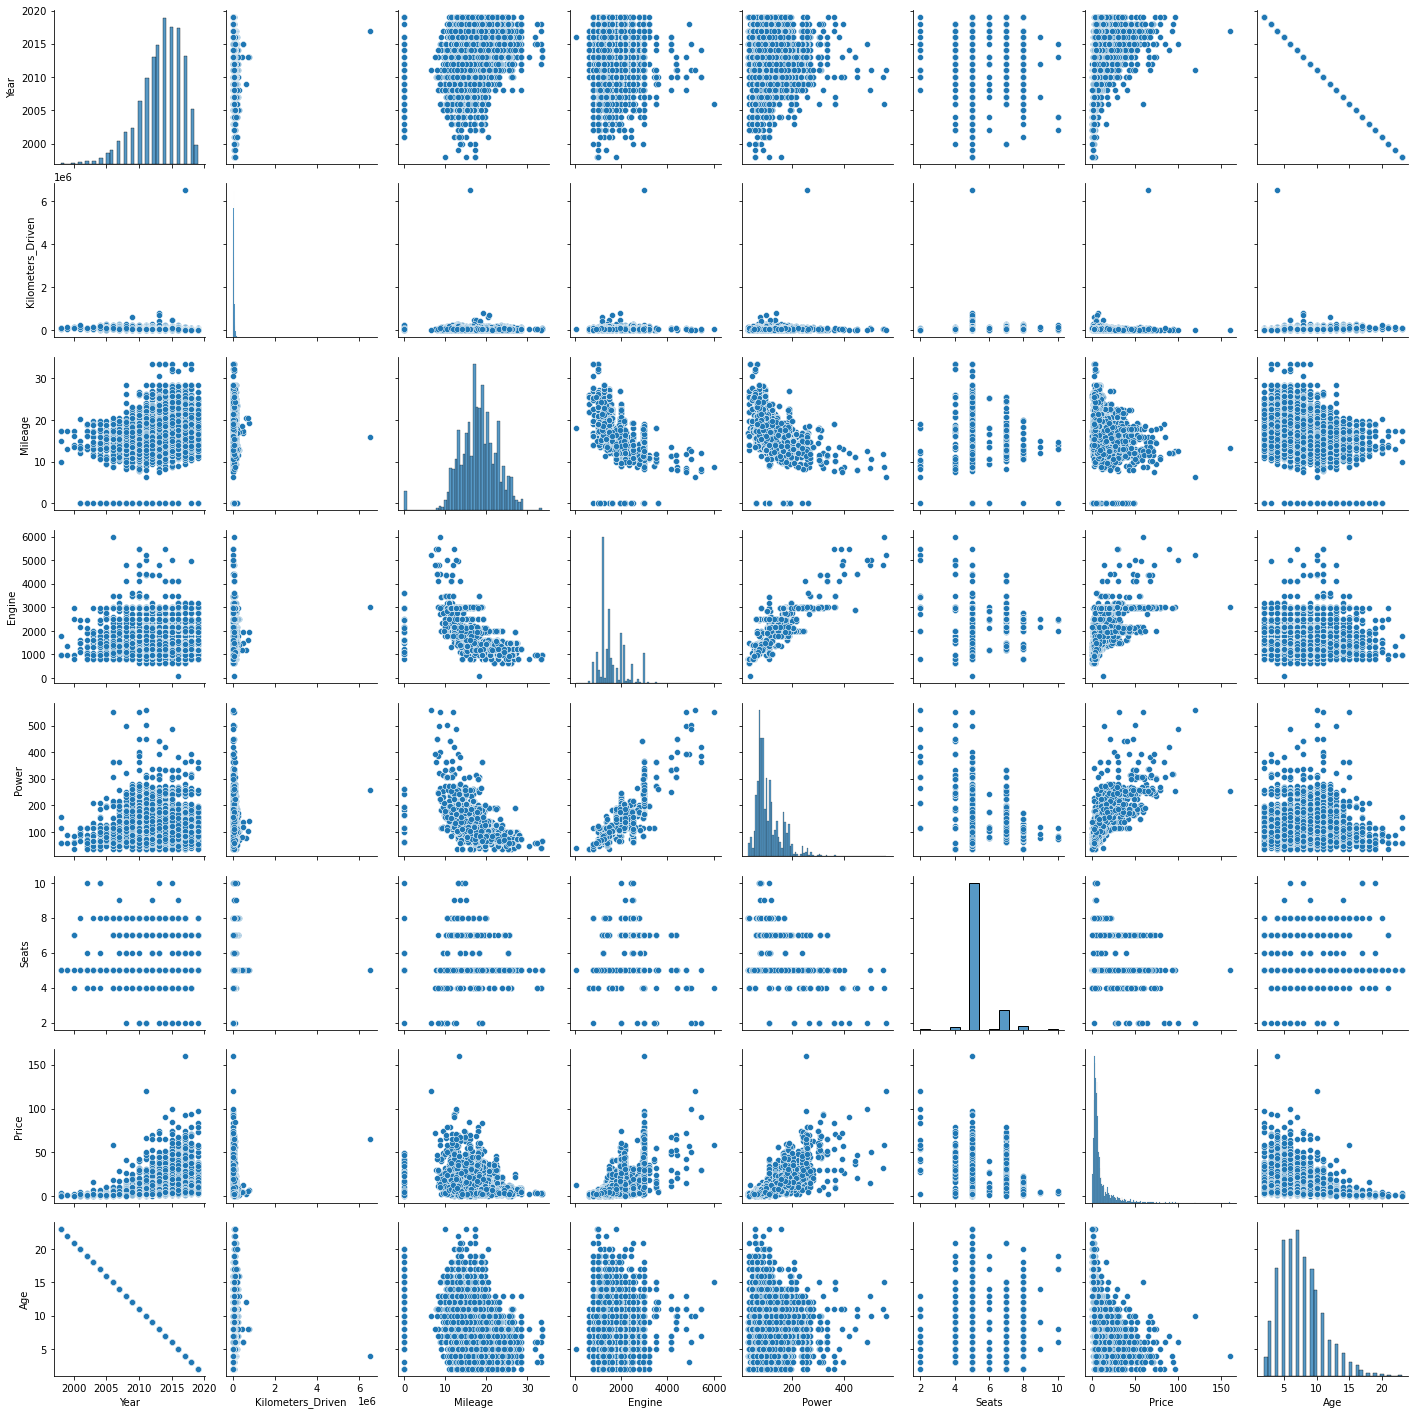

In [65]:
sns.pairplot(df)
plt.show()

# Encoding Categorical values 

In [77]:
from sklearn import preprocessing 
fit = preprocessing.LabelEncoder()
fit.fit(['CNG', 'Diesel' ,'Petrol', 'LPG' ,'Electric'])
df['Fuel_Type'] = fit.transform(df.Fuel_Type)
print(df.Fuel_Type.unique())

[0 1 4 3 2]


In [80]:
fit.fit(['Manual', 'Automatic'])
df['Transmission'] = fit.transform(df.Transmission)
print(df.Transmission.unique())

[1 0]


In [79]:
print(df.Transmission.unique())

['Manual' 'Automatic']


In [84]:
fit.fit(['Maruti' ,'Hyundai', 'Honda', 'Audi' ,'Nissan', 'Toyota' ,'Volkswagen', 'Tata',
 'Land', 'Mitsubishi', 'Renault' ,'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford',
 'Porsche', 'Datsun' ,'Jaguar' ,'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat',
 'Jeep', 'Smart' ,'Ambassador', 'Isuzu', 'ISUZU' ,'Force' ,'Bentley',
 'Lamborghini'])
df['Name'] = fit.transform(df.Name)
print(df.Name.unique())

[18 10  9  1 22 28 29 27 16 21 24 19  2 17  8 23  5 13 30  4 25 20  6 14
 26  0 12 11  7  3 15]


In [86]:
for i in df.index:
    if df.loc[i,"Owner_Type"] == "First":
        df.loc[i,"Owner_Type"] = 1
    if df.loc[i,"Owner_Type"] == "Second":
        df.loc[i,"Owner_Type"] = 2
    if df.loc[i,"Owner_Type"] == "Third":
        df.loc[i,"Owner_Type"] = 3
    if df.loc[i,"Owner_Type"] == "Fourth & Above":
        df.loc[i,"Owner_Type"] = 4

In [88]:
df.drop('Year',inplace = True,axis = 1)

In [90]:
df.drop('Location',inplace = True,axis = 1)

In [100]:
df.Owner_Type = df.Owner_Type.astype('int32')

In [102]:
df.Age = df.Age.astype('int32')

# Multiple Linear Regression Model

In [103]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
trainingSet, testingSet = train_test_split(df, test_size = test_size, random_state = seed)

In [104]:
import statsmodels.formula.api as smf

In [105]:
lm = smf.ols(formula = """Price ~ Name + Kilometers_Driven + Fuel_Type + Transmission + Owner_Type +
       Mileage + Engine + Power + Seats + Age """, data = trainingSet)
lm_result = lm.fit()
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1053.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:19:52   Log-Likelihood:                -14683.
No. Observations:                4514   AIC:                         2.939e+04
Df Residuals:                    4503   BIC:                         2.946e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.3900      1.49

In [107]:
lm = smf.ols(formula = """Price ~ Kilometers_Driven + Fuel_Type + Transmission  +
       Mileage + Engine + Power + Seats + Age """, data = trainingSet)
lm_result = lm.fit()
print(lm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:21:57   Log-Likelihood:                -14683.
No. Observations:                4514   AIC:                         2.938e+04
Df Residuals:                    4505   BIC:                         2.944e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.7091      1.46

# KNeighborsRegressor Model

In [212]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [213]:
x = df.drop("Price",axis=1)
y = df.Price

In [214]:
columns = x.columns

In [215]:
Scale = StandardScaler()
Scale = StandardScaler().fit(x[columns])
x[columns] = Scale.transform(x[columns])

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)

In [217]:
knn = KNeighborsRegressor()
knn_model = knn.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)

In [218]:
knn_model.score(x_test,y_test)

0.8348667442098744

In [219]:
knn_model.score(x_train,y_train)

0.9051704355393755

In [220]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':range(1,100),
          'weights': ['uniform', 'distance']
         }

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)

model.fit(np.array(x_train), np.array(y_train))

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']})

In [221]:
model.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [222]:
knn_optimized = KNeighborsRegressor(n_neighbors =  7, weights = 'distance')

In [223]:
knn_model_optimized = knn_optimized.fit(x_train,y_train)

In [224]:
knn_predict_optimized = knn_model_optimized.predict(x_test)

In [225]:
knn_model_optimized.score(x_test,y_test)

0.8495729011099142

In [226]:
knn_model_optimized.score(x_train,y_train)

0.9999524299291335

# Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
x = df.drop("Price",axis=1)
y = df.Price

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)

In [130]:
rf = RandomForestRegressor()

In [131]:
rf_model = rf.fit(x_train,y_train)

In [132]:
rf_predict = rf_model.predict(x_test)

In [136]:
rf_r2_value = rf_model.score(x_test,y_test)

In [134]:
rf_r2_value

0.8655692843648444

In [137]:
rf_r2_value_train = rf_model.score(x_train,y_train)

In [138]:
rf_r2_value_train

0.98390648925345

In [141]:
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_predict))

In [142]:
rf_rmse

3.818814594525236

In [199]:
from sklearn.model_selection import RandomizedSearchCV

In [200]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

In [201]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [202]:

rf = RandomForestRegressor()


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=1, random_state = 10, n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=10, verbose=1)

In [203]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 66,
 'bootstrap': False}

In [204]:
rf_reg = rf_random.best_estimator_

In [210]:
rf_reg.score(x_test,y_test)

0.8897928845036883

In [211]:
rf_reg.score(x_train,y_train)

0.9901407063940396

# XGBRegressor Model 

In [227]:
from xgboost import XGBRegressor

In [231]:
x = df.drop("Price",axis=1)
y = df.Price

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)

In [233]:
XGB = XGBRegressor()

In [234]:
XGB_model = XGB.fit(x_train,y_train)

In [235]:
XGB_predict = XGB_model.predict(x_test)

In [236]:
XGB_r2_value_train= XGB_model.score(x_train,y_train)

In [237]:
XGB_r2_value_train

0.9941724584836864

In [238]:
XGB_r2_value_test= XGB_model.score(x_test,y_test)
XGB_r2_value_test

0.8912751242566773

In [239]:
XGB_rmse = np.sqrt(mean_squared_error(y_test,XGB_predict))

In [240]:
XGB_rmse

3.4343438765693937

In [241]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [243]:

XGB = XGBRegressor()


XGB_random = RandomizedSearchCV(estimator = XGB, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=1, random_state = 10, n_jobs = -1)

XGB_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[09:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [245]:
XGB_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': True}

In [246]:
XGB_optimized_model = XGB_random.best_estimator_

In [247]:
XGB_optimized_model.score(x_test,y_test)

0.8756373922657299

In [248]:
XGB_optimized_model.score(x_train,y_train)

0.9999506058289738